# CASE: BOMBOM - Advanced Analytics IBM + Vale

## Realizado por: Sabrina Otoni da Silva

## Etapa do EDA

In [1]:
from pathlib import Path 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

from statsmodels.stats.oneway import anova_oneway
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats
import pingouin as pg

from sklearn.preprocessing import OneHotEncoder

In [2]:
datapath = Path('../data')

In [3]:
data = pd.read_excel(f'{datapath}/01_raw/registros-prod.xlsx')
data_bkp = pd.read_excel(f'{datapath}/01_raw/registros-prod.xlsx')
data.head()

,QTD_CHOC,VAR_1,VAR_2,PESO_BOMBOM
0,320.15,0.88,A,10.144919
1,320.14,1.55,A,11.547027
2,284.85,2.97,A,11.112109
3,263.92,2.36,C,9.900123
4,276.22,2.98,C,10.079822


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   QTD_CHOC     500 non-null    float64
 1   VAR_1        500 non-null    float64
 2   VAR_2        500 non-null    object 
 3   PESO_BOMBOM  500 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.8+ KB


In [5]:
data.describe()

,QTD_CHOC,VAR_1,PESO_BOMBOM
count,500.000000,500.000000,500.000000
mean,291.264600,2.098180,10.395002
std,45.182499,0.711166,1.572233
min,112.910000,0.050000,4.543124
25%,259.267500,1.630000,9.425819
50%,295.450000,2.300000,10.334273
75%,325.137500,2.672500,11.379932
max,436.070000,2.980000,17.362728


In [6]:
data[data['PESO_BOMBOM'] < 9.0].describe()

,QTD_CHOC,VAR_1,PESO_BOMBOM
count,83.000000,83.000000,83.000000
mean,264.372048,1.364819,8.084817
std,41.661540,0.619286,0.760860
min,112.910000,0.050000,4.543124
25%,237.880000,0.880000,7.754924
50%,266.780000,1.330000,8.322796
75%,296.010000,1.865000,8.694574
max,332.720000,2.590000,8.966839


In [7]:
data[data['PESO_BOMBOM'] > 10.0].describe()

,QTD_CHOC,VAR_1,PESO_BOMBOM
count,299.000000,299.000000,299.000000
mean,306.999365,2.232676,11.368813
std,38.983993,0.658365,1.107841
min,193.350000,0.080000,10.011102
25%,283.585000,1.910000,10.534765
50%,311.300000,2.430000,11.171338
75%,336.820000,2.750000,11.945084
max,436.070000,2.980000,17.362728


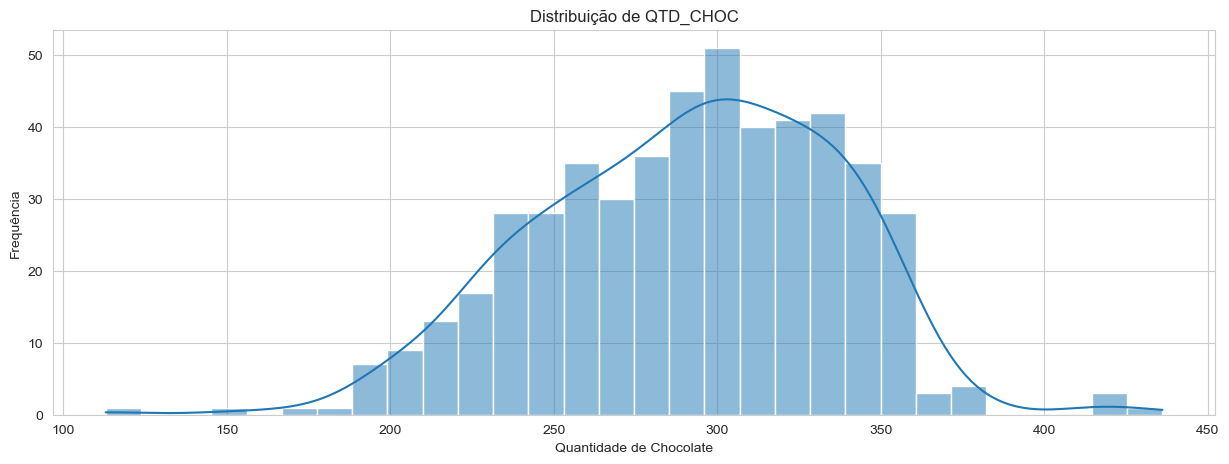

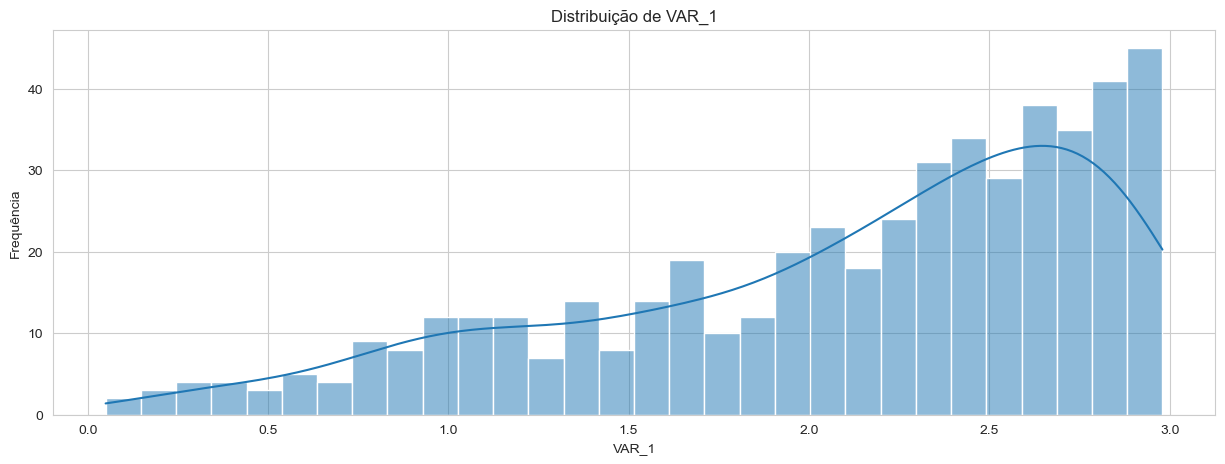

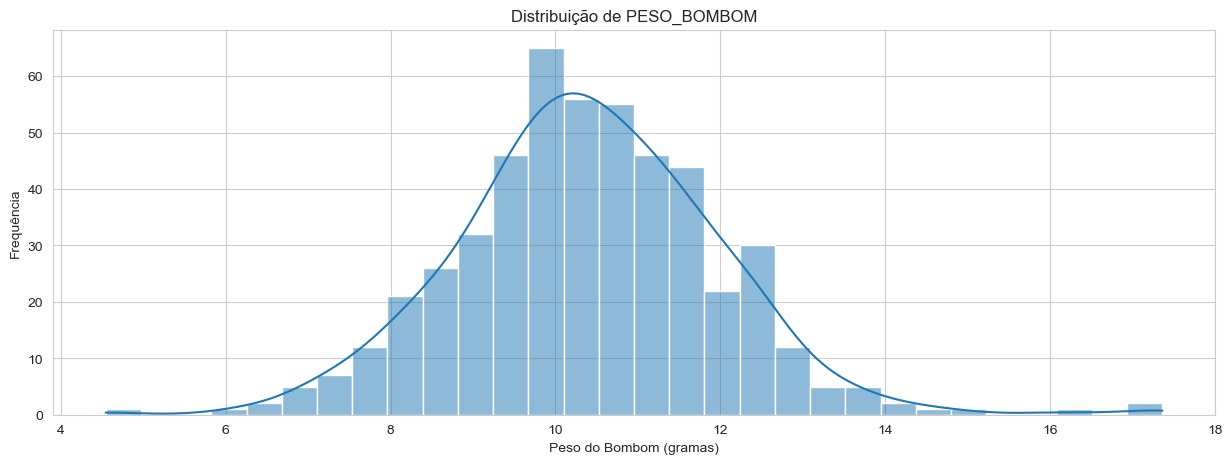

In [8]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))
sns.histplot(data['QTD_CHOC'], bins=30, kde=True)
plt.title('Distribuição de QTD_CHOC')
plt.xlabel('Quantidade de Chocolate')
plt.ylabel('Frequência')
plt.show()

fig = px.box(data_frame=data, x='QTD_CHOC')
fig.show()

plt.figure(figsize=(15, 5))
sns.histplot(data['VAR_1'], bins=30, kde=True)
plt.title('Distribuição de VAR_1')
plt.xlabel('VAR_1')
plt.ylabel('Frequência')
plt.show()

fig = px.box(data_frame=data, x='VAR_1')
fig.show()

plt.figure(figsize=(15, 5))
sns.histplot(data['PESO_BOMBOM'], bins=30, kde=True)
plt.title('Distribuição de PESO_BOMBOM')
plt.xlabel('Peso do Bombom (gramas)')
plt.ylabel('Frequência')
plt.show()

fig = px.box(data_frame=data, x='PESO_BOMBOM')
fig.show()

In [9]:
stats.shapiro(data['PESO_BOMBOM'])

ShapiroResult(statistic=0.9864102602005005, pvalue=0.0001293691311730072)

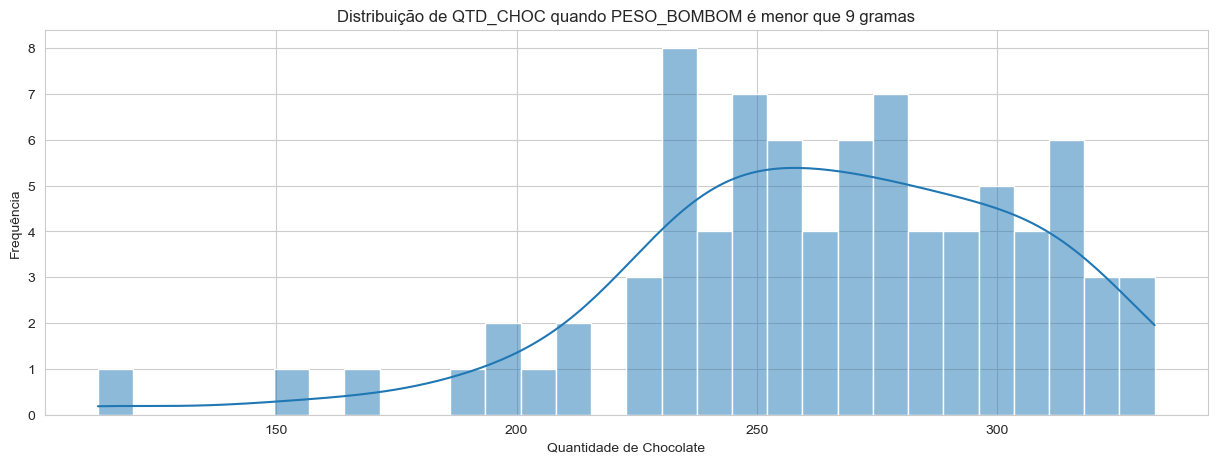

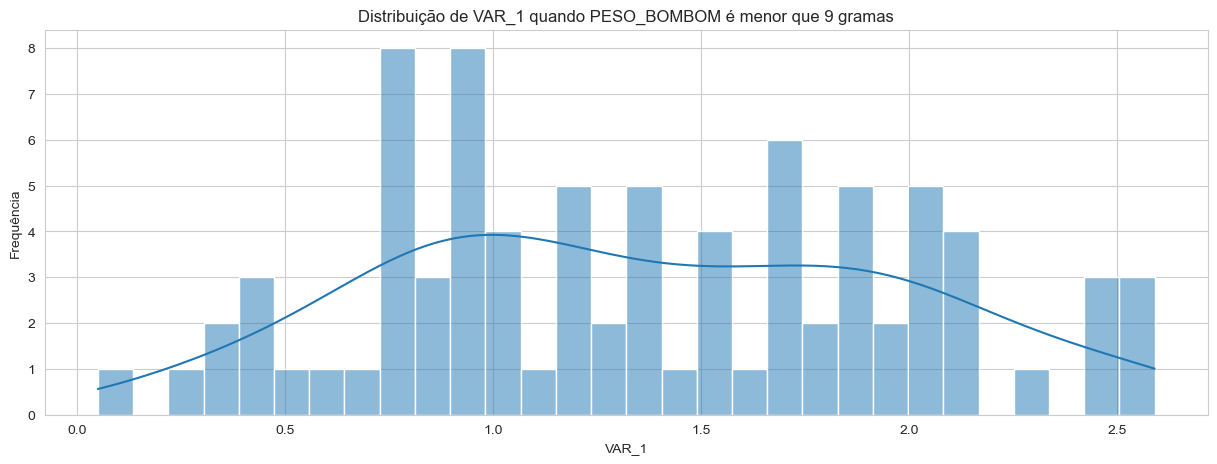

In [10]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))
sns.histplot(data.loc[data['PESO_BOMBOM'] < 9.0, 'QTD_CHOC'], bins=30, kde=True)
plt.title('Distribuição de QTD_CHOC quando PESO_BOMBOM é menor que 9 gramas')
plt.xlabel('Quantidade de Chocolate')
plt.ylabel('Frequência')
plt.show()

fig = px.box(data_frame=data, x=data.loc[data['PESO_BOMBOM'] < 9.0, 'QTD_CHOC'])
fig.show()

plt.figure(figsize=(15, 5))
sns.histplot(data.loc[data['PESO_BOMBOM'] < 9.0, 'VAR_1'], bins=30, kde=True)
plt.title('Distribuição de VAR_1 quando PESO_BOMBOM é menor que 9 gramas')
plt.xlabel('VAR_1')
plt.ylabel('Frequência')
plt.show()

fig = px.box(data_frame=data, x=data.loc[data['PESO_BOMBOM'] < 9.0, 'VAR_1'])
fig.show()

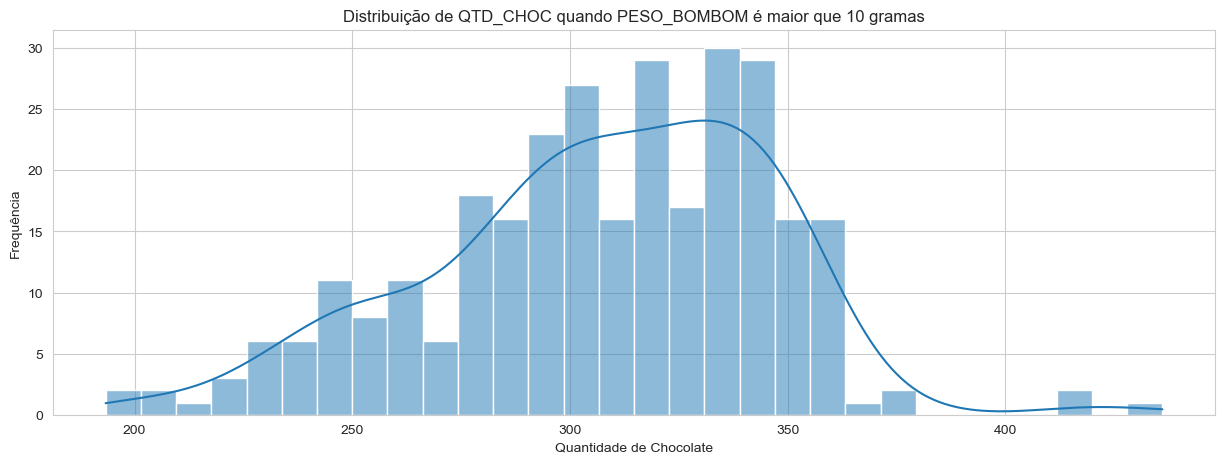

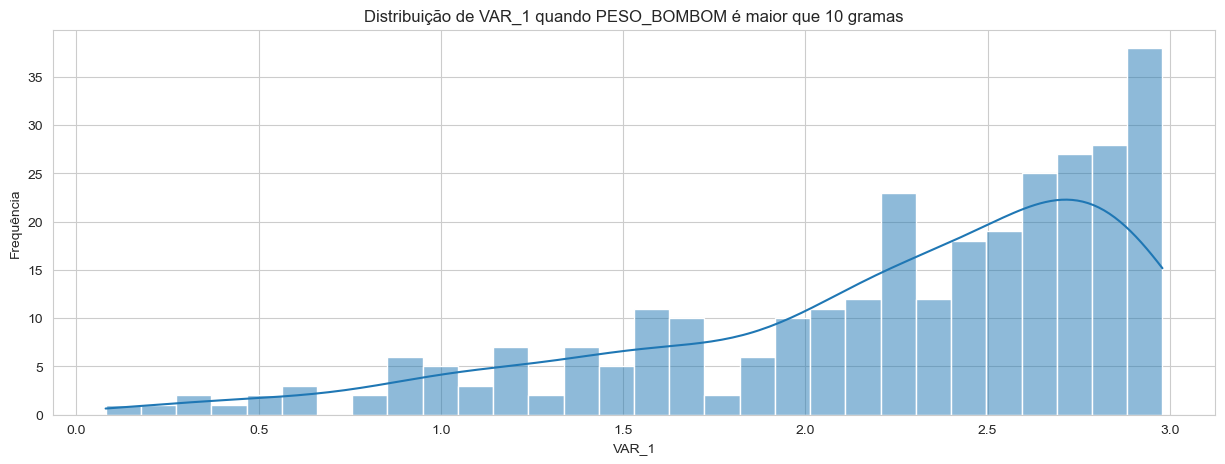

In [11]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 5))
sns.histplot(data.loc[data['PESO_BOMBOM'] > 10.0, 'QTD_CHOC'], bins=30, kde=True)
plt.title('Distribuição de QTD_CHOC quando PESO_BOMBOM é maior que 10 gramas')
plt.xlabel('Quantidade de Chocolate')
plt.ylabel('Frequência')
plt.show()

fig = px.box(data_frame=data, x=data.loc[data['PESO_BOMBOM'] > 10.0, 'QTD_CHOC'])
fig.show()

plt.figure(figsize=(15, 5))
sns.histplot(data.loc[data['PESO_BOMBOM'] > 10.0, 'VAR_1'], bins=30, kde=True)
plt.title('Distribuição de VAR_1 quando PESO_BOMBOM é maior que 10 gramas')
plt.xlabel('VAR_1')
plt.ylabel('Frequência')
plt.show()

fig = px.box(data_frame=data, x=data.loc[data['PESO_BOMBOM'] > 10.0, 'VAR_1'])
fig.show()

In [12]:
for col in data.columns:
    if data[col].dtype == 'object' or col == 'VAR_2':
        data[col] = data[col].astype('category')

In [13]:
data['VAR_2'].value_counts()

C    177
B    165
A    158
Name: VAR_2, dtype: int64

In [14]:
data.loc[data['PESO_BOMBOM'] < 9.0, 'VAR_2'].value_counts()

B    53
C    30
A     0
Name: VAR_2, dtype: int64

In [15]:
data.loc[data['PESO_BOMBOM'] > 10.0, 'VAR_2'].value_counts()

A    152
C     88
B     59
Name: VAR_2, dtype: int64

In [16]:
fig = make_subplots(rows=len(data['VAR_2'].unique()), cols=1, subplot_titles=data['VAR_2'].unique())

for i, classe in enumerate(data['VAR_2'].unique(), start=1):
    data_classe = data[data['VAR_2'] == classe]['PESO_BOMBOM']
    fig.add_trace(go.Histogram(x=data_classe, nbinsx=30, name=classe), row=i, col=1)

fig.update_layout(title_text='Distribuição de VAR_2 para PESO_BOMBOM', autosize=False, showlegend=False, width=800, height=900,
                  margin=dict(t=50, b=50, l=50, r=50))
fig.show()

fig = px.box(data_frame=data, x='VAR_2', y='PESO_BOMBOM')
fig.update_layout(title="VAR_2 vs PESO_BOMBOM", xaxis_title="VAR_2", yaxis_title="PESO_BOMBOM")
fig.show()

In [17]:
stats.shapiro(data['PESO_BOMBOM'][data['VAR_2'] == 'A'])

ShapiroResult(statistic=0.996665358543396, pvalue=0.9798555970191956)

In [18]:
stats.shapiro(data['PESO_BOMBOM'][data['VAR_2'] == 'B'])

ShapiroResult(statistic=0.9821290969848633, pvalue=0.031833749264478683)

In [19]:
stats.shapiro(data['PESO_BOMBOM'][data['VAR_2'] == 'C'])

ShapiroResult(statistic=0.8839715719223022, pvalue=1.7232820725965325e-10)

In [20]:
abs_A = np.abs(data['PESO_BOMBOM'][data['VAR_2'] == 'A'] - np.median(data['PESO_BOMBOM'][data['VAR_2'] == 'A']))
abs_B = np.abs(data['PESO_BOMBOM'][data['VAR_2'] == 'B'] - np.median(data['PESO_BOMBOM'][data['VAR_2'] == 'B']))
abs_C = np.abs(data['PESO_BOMBOM'][data['VAR_2'] == 'C'] - np.median(data['PESO_BOMBOM'][data['VAR_2'] == 'C']))

brown_forsythe_test = stats.f_oneway(abs_A, abs_B)
print(brown_forsythe_test)

F_onewayResult(statistic=6.392227115986417, pvalue=0.011941198470698666)


In [21]:
brown_forsythe_test = stats.f_oneway(abs_A, abs_C)
print(brown_forsythe_test)

F_onewayResult(statistic=5.356366373772371, pvalue=0.021254758960704938)


In [22]:
brown_forsythe_test = stats.f_oneway(abs_B, abs_C)
print(brown_forsythe_test)

F_onewayResult(statistic=0.5773175677807946, pvalue=0.4478921834974905)


In [23]:
brown_forsythe_test = stats.f_oneway(abs_A, abs_B, abs_C)
print(brown_forsythe_test)

F_onewayResult(statistic=3.4311968388413305, pvalue=0.0331164776859565)


In [24]:
result = anova_oneway(data['PESO_BOMBOM'], data['VAR_2'], use_var='unequal')
print(result)

statistic = 165.29763577732814
pvalue = 2.667457955543307e-50
df = (2.0, 326.2070279437124)
df_num = 2.0
df_denom = 326.2070279437124
nobs_t = 500.0
n_groups = 3
means = [11.65911479  9.595768   10.01163301]
nobs = [158. 165. 177.]
vars_ = [0.96304105 1.32984584 2.72898168]
use_var = unequal
welch_correction = True
tuple = (165.29763577732814, 2.667457955543307e-50)


In [25]:
resultado_games_howell = pg.pairwise_gameshowell(dv='PESO_BOMBOM', between='VAR_2', data=data)
print(resultado_games_howell)

   A  B    mean(A)    mean(B)      diff        se          T          df  \
0  A  C  11.659115  10.011633  1.647482  0.146674  11.232292  291.578257   
1  A  B  11.659115   9.595768  2.063347  0.118974  17.342804  316.664776   
2  C  B  10.011633   9.595768  0.415865  0.153224   2.714095  315.560164   

       pval    hedges  
0  0.000000  1.193649  
1  0.000000  1.919212  
2  0.019158  0.289522  


In [26]:
fig = make_subplots(rows=len(data['VAR_2'].unique()), cols=1, subplot_titles=data['VAR_2'].unique())

for i, classe in enumerate(data['VAR_2'].unique(), start=1):
    data_classe = data[data['VAR_2'] == classe]['QTD_CHOC']
    fig.add_trace(go.Histogram(x=data_classe, nbinsx=30, name=classe), row=i, col=1)

fig.update_layout(title_text='Distribuição de VAR_2 para QTD_CHOC', autosize=False, showlegend=False, width=800, height=900,
                  margin=dict(t=50, b=50, l=50, r=50))
fig.show()

fig = px.box(data_frame=data, x='VAR_2', y='QTD_CHOC')
fig.update_layout(title="VAR_2 vs QTD_CHOC", xaxis_title="VAR_2", yaxis_title="QTD_CHOC")
fig.show()

In [27]:
fig = make_subplots(rows=len(data['VAR_2'].unique()), cols=1, subplot_titles=data['VAR_2'].unique())

for i, classe in enumerate(data['VAR_2'].unique(), start=1):
    data_classe = data[data['VAR_2'] == classe]['VAR_1']
    fig.add_trace(go.Histogram(x=data_classe, nbinsx=30, name=classe), row=i, col=1)

fig.update_layout(title_text='Distribuição de VAR_2 para VAR_1', autosize=False, showlegend=False, width=800, height=900,
                  margin=dict(t=50, b=50, l=50, r=50))
fig.show()

fig = px.box(data_frame=data, x='VAR_2', y='VAR_1')
fig.update_layout(title="VAR_2 vs VAR_1", xaxis_title="VAR_2", yaxis_title="VAR_1")
fig.show()

In [28]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('QTD_CHOC vs PESO_BOMBOM', 'VAR_1 vs PESO_BOMBOM'))

fig.add_trace(go.Scatter(x=data['QTD_CHOC'], y=data['PESO_BOMBOM'], mode='markers'), row=1, col=1)
fig.add_trace(go.Scatter(x=data['VAR_1'], y=data['PESO_BOMBOM'], mode='markers'), row=1, col=2)

fig.update_xaxes(title_text='QTD_CHOC', row=1, col=1)
fig.update_yaxes(title_text='PESO_BOMBOM', row=1, col=1)

fig.update_xaxes(title_text='VAR_1', row=1, col=2)
fig.update_yaxes(title_text='PESO_BOMBOM', row=1, col=2)

fig.update_layout(title_text='Comparações de QTD_CHOC e VAR_1 com PESO_BOMBOM', showlegend=False)
fig.show()

In [29]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('QTD_CHOC vs PESO_BOMBOM', 'VAR_1 vs PESO_BOMBOM'))

fig.add_trace(go.Scatter(x=data.loc[data['PESO_BOMBOM'] < 9.0, 'QTD_CHOC'], y=data.loc[data['PESO_BOMBOM'] < 9.0, 'PESO_BOMBOM'], mode='markers'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.loc[data['PESO_BOMBOM'] < 9.0, 'VAR_1'], y=data.loc[data['PESO_BOMBOM'] < 9.0, 'PESO_BOMBOM'], mode='markers'), row=1, col=2)

fig.update_xaxes(title_text='QTD_CHOC', row=1, col=1)
fig.update_yaxes(title_text='PESO_BOMBOM', row=1, col=1)

fig.update_xaxes(title_text='VAR_1', row=1, col=2)
fig.update_yaxes(title_text='PESO_BOMBOM', row=1, col=2)

fig.update_layout(title_text='Comparações de QTD_CHOC e VAR_1 com PESO_BOMBOM quando menor que 9 gramas', showlegend=False)
fig.show()

In [30]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('QTD_CHOC vs PESO_BOMBOM', 'VAR_1 vs PESO_BOMBOM'))

fig.add_trace(go.Scatter(x=data.loc[data['PESO_BOMBOM'] > 10.0, 'QTD_CHOC'], y=data.loc[data['PESO_BOMBOM'] > 10.0, 'PESO_BOMBOM'], mode='markers'), row=1, col=1)
fig.add_trace(go.Scatter(x=data.loc[data['PESO_BOMBOM'] > 10.0, 'VAR_1'], y=data.loc[data['PESO_BOMBOM'] > 10.0, 'PESO_BOMBOM'], mode='markers'), row=1, col=2)

fig.update_xaxes(title_text='QTD_CHOC', row=1, col=1)
fig.update_yaxes(title_text='PESO_BOMBOM', row=1, col=1)

fig.update_xaxes(title_text='VAR_1', row=1, col=2)
fig.update_yaxes(title_text='PESO_BOMBOM', row=1, col=2)

fig.update_layout(title_text='Comparações de QTD_CHOC e VAR_1 com PESO_BOMBOM quando maior que 10 gramas', showlegend=False)
fig.show()

In [31]:
fig = make_subplots(rows=1, cols=1, subplot_titles=('VAR_1 vs QTD_CHOC'))

fig.add_trace(go.Scatter(x=data['VAR_1'], y=data['QTD_CHOC'], mode='markers'), row=1, col=1)

fig.update_xaxes(title_text='VAR_1', row=1, col=1)
fig.update_yaxes(title_text='QTD_CHOC', row=1, col=1)

fig.update_layout(title_text='Comparação de QTD_CHOC e VAR_1', showlegend=False)
fig.show()

In [32]:
fig = make_subplots(rows=1, cols=1, subplot_titles=('VAR_1 vs QTD_CHOC'))

fig.add_trace(go.Scatter(x=data.loc[data['PESO_BOMBOM'] < 9.0, 'VAR_1'], y=data.loc[data['PESO_BOMBOM'] < 9.0, 'QTD_CHOC'], mode='markers'), row=1, col=1)

fig.update_xaxes(title_text='VAR_1', row=1, col=1)
fig.update_yaxes(title_text='QTD_CHOC', row=1, col=1)

fig.update_layout(title_text='Comparação de QTD_CHOC e VAR_1 quando PESO_BOMBOM é menor que 9 gramas', showlegend=False)
fig.show()

In [33]:
fig = make_subplots(rows=1, cols=1, subplot_titles=('VAR_1 vs QTD_CHOC'))

fig.add_trace(go.Scatter(x=data.loc[data['PESO_BOMBOM'] > 10.0, 'VAR_1'], y=data.loc[data['PESO_BOMBOM'] > 10.0, 'QTD_CHOC'], mode='markers'), row=1, col=1)

fig.update_xaxes(title_text='VAR_1', row=1, col=1)
fig.update_yaxes(title_text='QTD_CHOC', row=1, col=1)

fig.update_layout(title_text='Comparação de QTD_CHOC e VAR_1 quando PESO_BOMBOM é maior que 10 gramas', showlegend=False)
fig.show()

In [34]:
fig = ff.create_annotated_heatmap(
    z=data.select_dtypes(include=[np.number]).corr().values,
    x=list(data.select_dtypes(include=[np.number]).columns),
    y=list(data.select_dtypes(include=[np.number]).columns),
    annotation_text=data.select_dtypes(include=[np.number]).corr().round(2).values,
    colorscale='Blues',
    showscale=True
)
fig.update_layout(title_text='Matriz de Correlação', autosize=False, width=600, height=480, margin=dict(t=50, b=50, l=50, r=50))
fig.show()

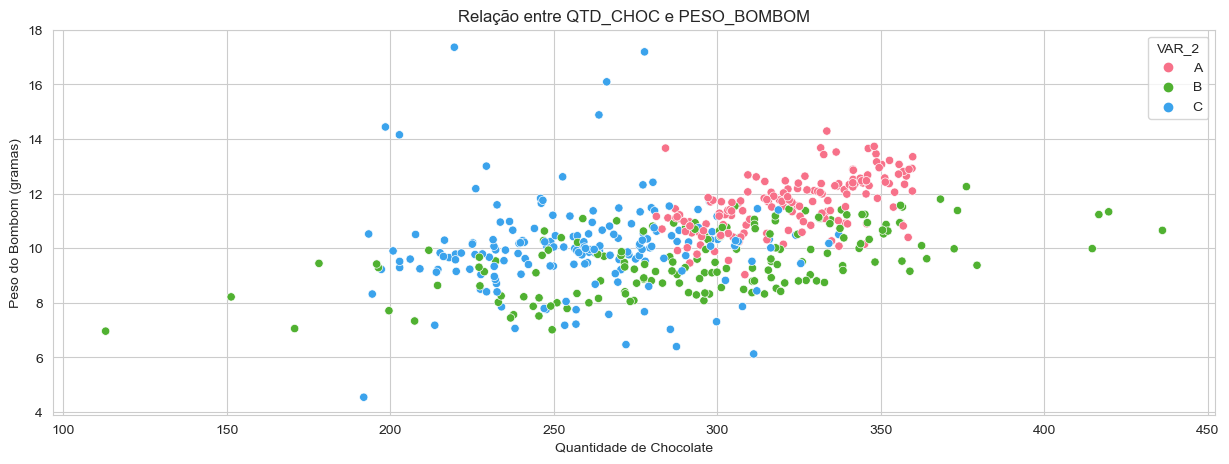

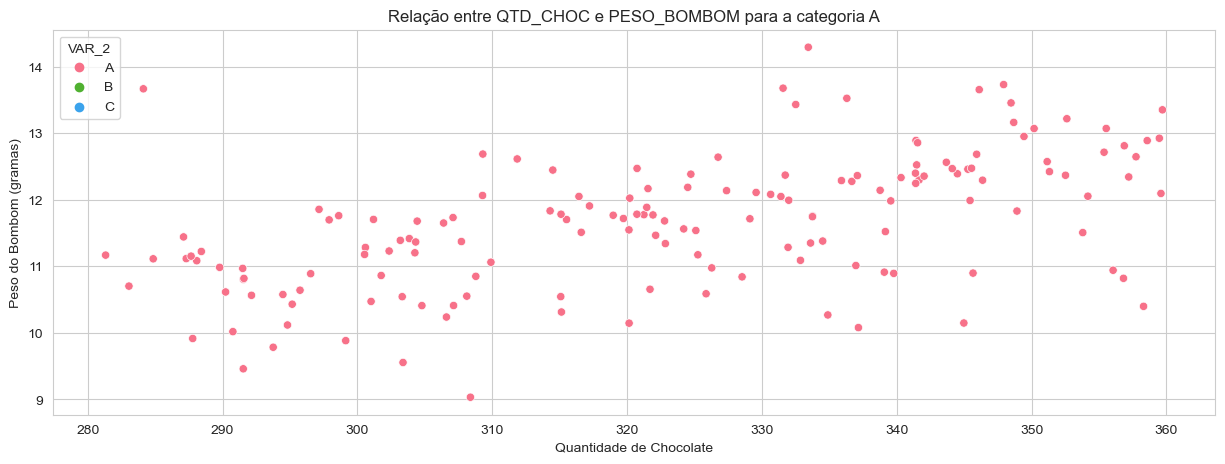

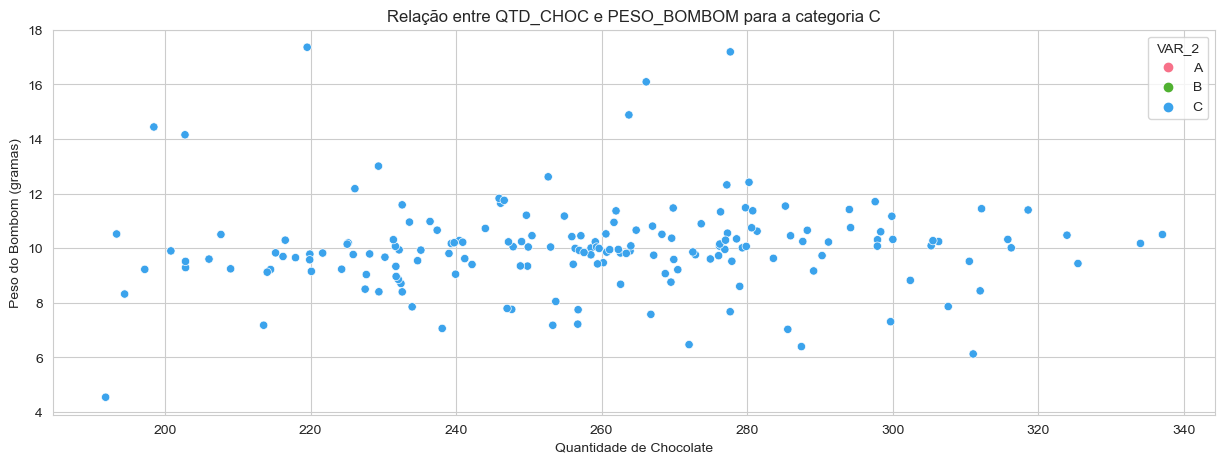

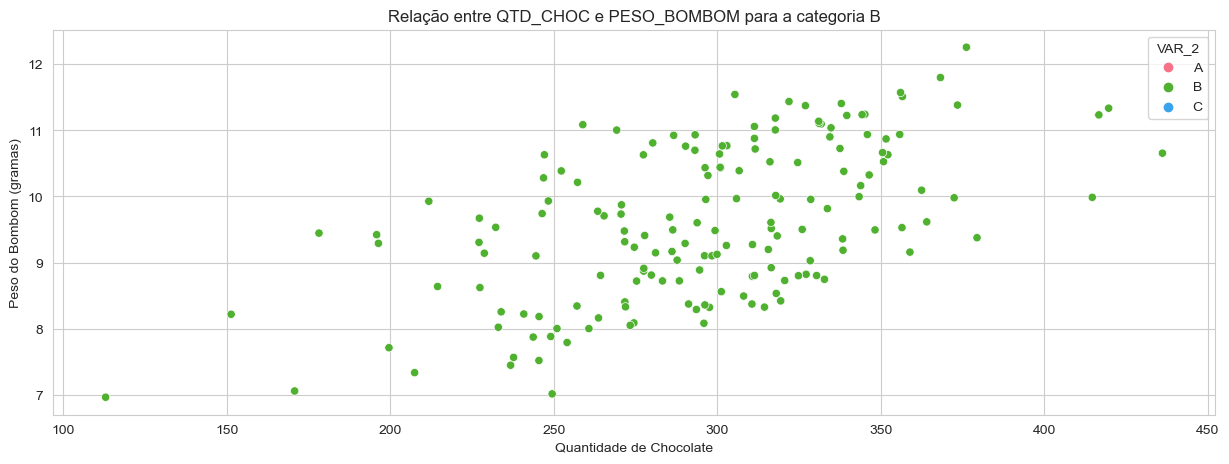

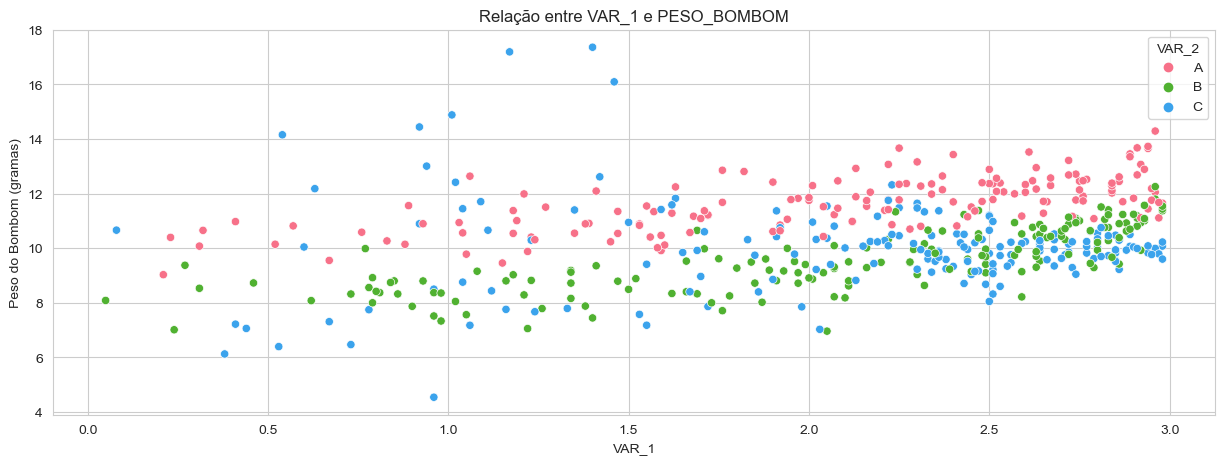

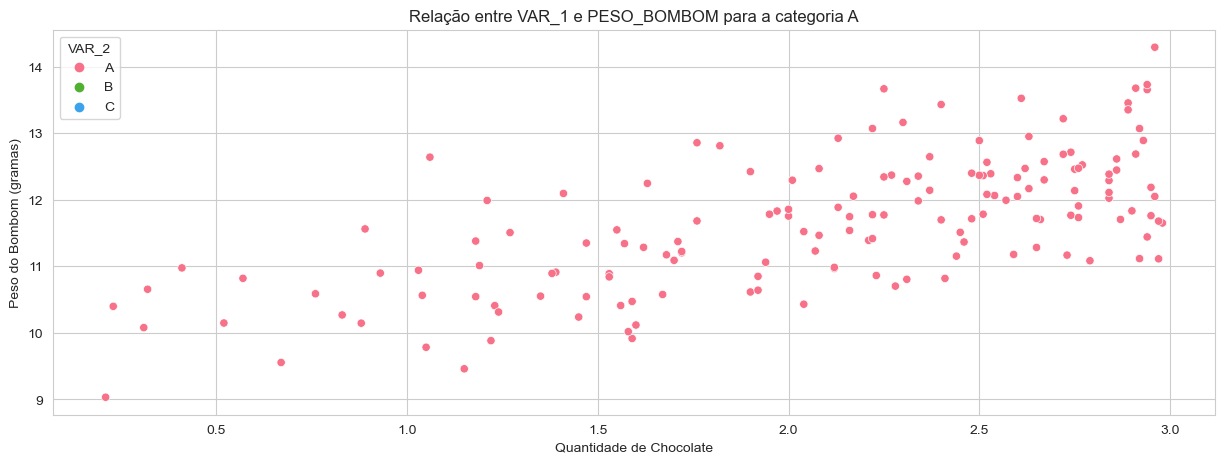

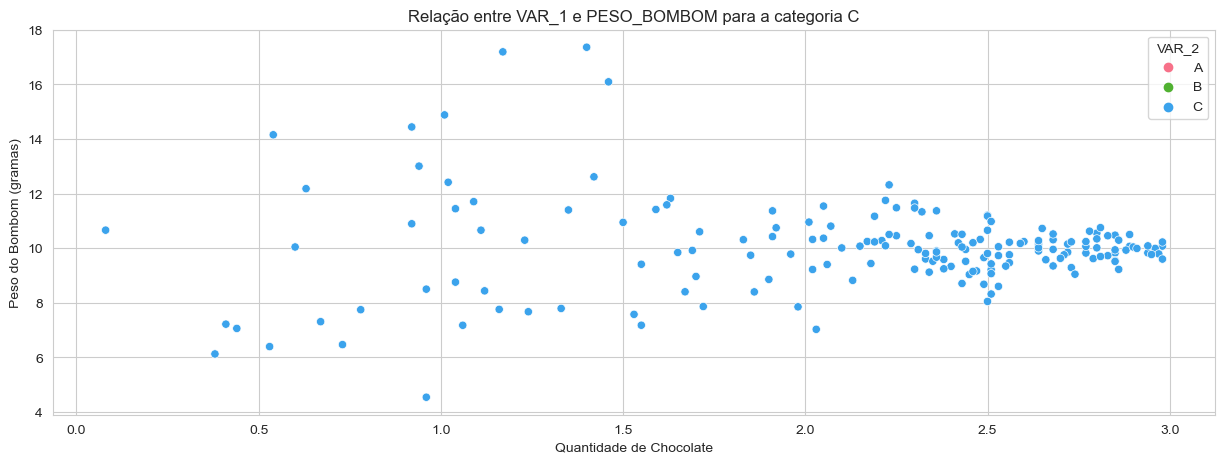

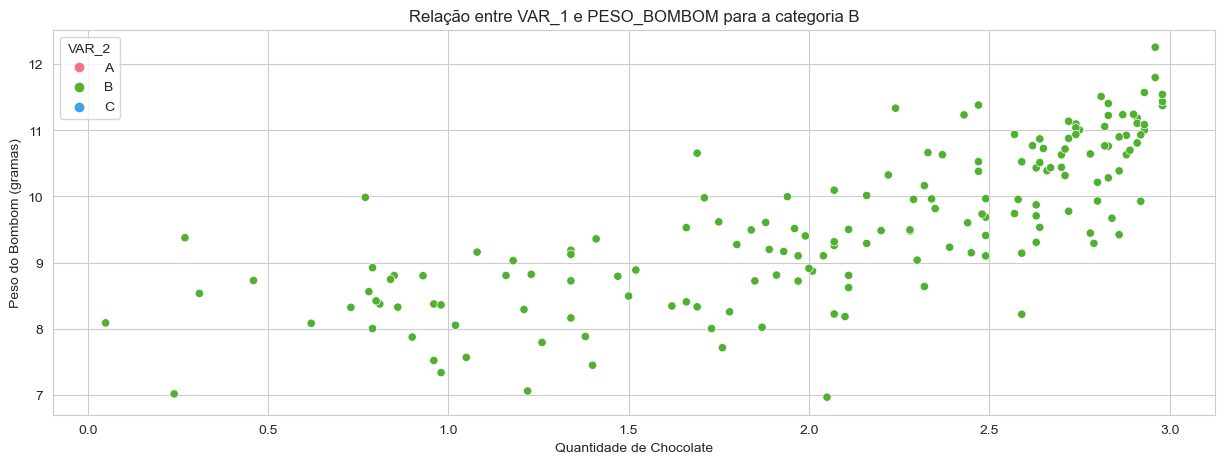

In [35]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x=data['QTD_CHOC'], y=data['PESO_BOMBOM'], hue=data['VAR_2'], palette="husl")
plt.title('Relação entre QTD_CHOC e PESO_BOMBOM')
plt.xlabel('Quantidade de Chocolate')
plt.ylabel('Peso do Bombom (gramas)')
plt.show()

for i in data['VAR_2'].unique():
    plt.figure(figsize=(15, 5))
    subset = data[data['VAR_2'] == i]
    sns.scatterplot(x='QTD_CHOC', y='PESO_BOMBOM', hue=data['VAR_2'], data=subset, palette="husl")
    plt.title(f'Relação entre QTD_CHOC e PESO_BOMBOM para a categoria {i}')
    plt.xlabel('Quantidade de Chocolate')
    plt.ylabel('Peso do Bombom (gramas)')
    plt.show()

plt.figure(figsize=(15, 5))
sns.scatterplot(x=data['VAR_1'], y=data['PESO_BOMBOM'], hue=data['VAR_2'], palette="husl")
plt.title('Relação entre VAR_1 e PESO_BOMBOM')
plt.xlabel('VAR_1')
plt.ylabel('Peso do Bombom (gramas)')
plt.show()

for i in data['VAR_2'].unique():
    plt.figure(figsize=(15, 5))
    subset = data[data['VAR_2'] == i]
    sns.scatterplot(x='VAR_1', y='PESO_BOMBOM', hue=data['VAR_2'], data=subset, palette="husl")
    plt.title(f'Relação entre VAR_1 e PESO_BOMBOM para a categoria {i}')
    plt.xlabel('Quantidade de Chocolate')
    plt.ylabel('Peso do Bombom (gramas)')
    plt.show()

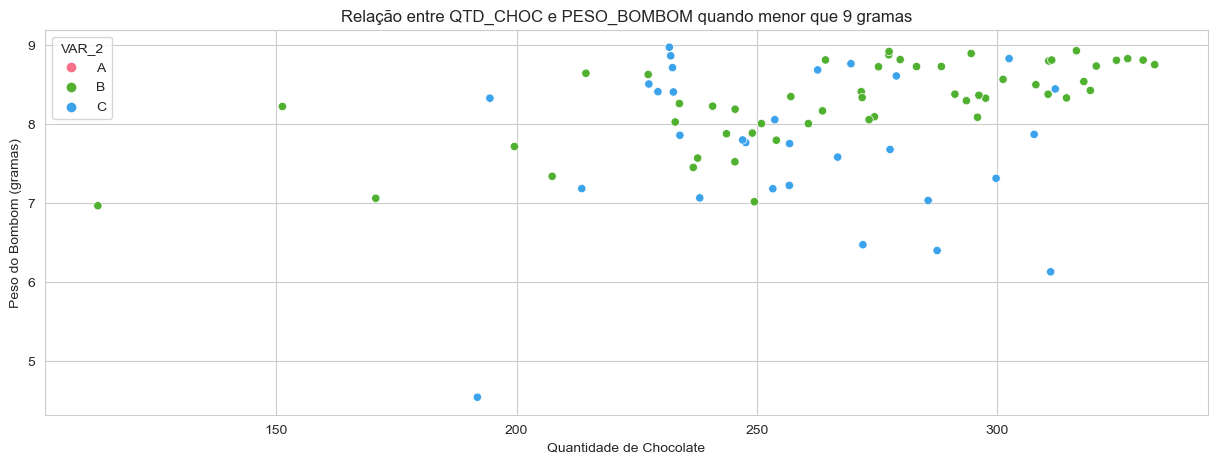

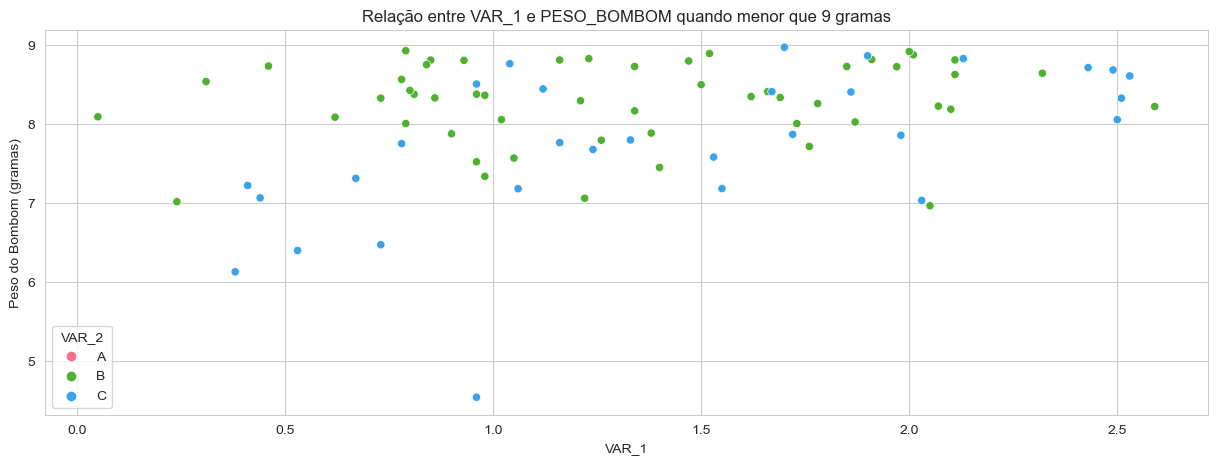

In [36]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x=data.loc[data['PESO_BOMBOM'] < 9.0, 'QTD_CHOC'], y=data.loc[data['PESO_BOMBOM'] < 9.0, 'PESO_BOMBOM'], hue=data.loc[data['PESO_BOMBOM'] < 9.0, 'VAR_2'], palette="husl")
plt.title('Relação entre QTD_CHOC e PESO_BOMBOM quando menor que 9 gramas')
plt.xlabel('Quantidade de Chocolate')
plt.ylabel('Peso do Bombom (gramas)')
plt.show()

plt.figure(figsize=(15, 5))
sns.scatterplot(x=data.loc[data['PESO_BOMBOM'] < 9.0, 'VAR_1'], y=data.loc[data['PESO_BOMBOM'] < 9.0, 'PESO_BOMBOM'], hue=data.loc[data['PESO_BOMBOM'] < 9.0, 'VAR_2'], palette="husl")
plt.title('Relação entre VAR_1 e PESO_BOMBOM quando menor que 9 gramas')
plt.xlabel('VAR_1')
plt.ylabel('Peso do Bombom (gramas)')
plt.show()

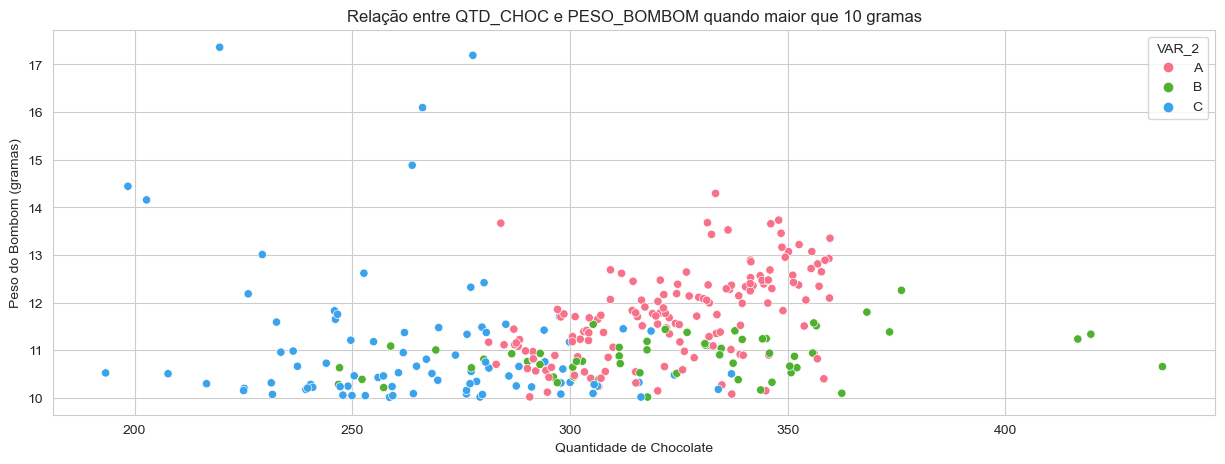

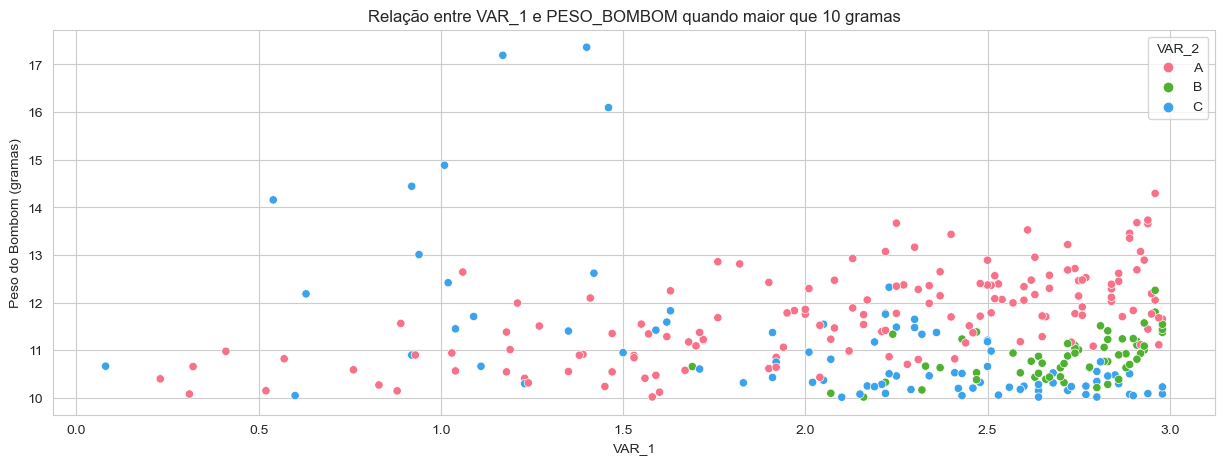

In [37]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x=data.loc[data['PESO_BOMBOM'] > 10.0, 'QTD_CHOC'], y=data.loc[data['PESO_BOMBOM'] > 10.0, 'PESO_BOMBOM'], hue=data.loc[data['PESO_BOMBOM'] > 10.0, 'VAR_2'], palette="husl")
plt.title('Relação entre QTD_CHOC e PESO_BOMBOM quando maior que 10 gramas')
plt.xlabel('Quantidade de Chocolate')
plt.ylabel('Peso do Bombom (gramas)')
plt.show()

plt.figure(figsize=(15, 5))
sns.scatterplot(x=data.loc[data['PESO_BOMBOM'] > 10.0, 'VAR_1'], y=data.loc[data['PESO_BOMBOM'] > 10.0, 'PESO_BOMBOM'], hue=data.loc[data['PESO_BOMBOM'] > 10.0, 'VAR_2'], palette="husl")
plt.title('Relação entre VAR_1 e PESO_BOMBOM quando maior que 10 gramas')
plt.xlabel('VAR_1')
plt.ylabel('Peso do Bombom (gramas)')
plt.show()

In [38]:
categorias = data['VAR_2'].unique()
for categoria in categorias:
    newdata = data[data['VAR_2'] == categoria]
    fig = px.scatter_3d(newdata, x='VAR_1', y='PESO_BOMBOM', z='QTD_CHOC',
                        color='VAR_2',
                        labels={'VAR_1': 'VAR_1', 'PESO_BOMBOM': 'Peso do Bombom', 'QTD_CHOC': 'Quantidade de Chocolate'},
                        title=f'Visualizando o comportamento de todas as features juntas para VAR_2: {categoria}')
    fig.update_traces(marker=dict(size=3))
    fig.show()

In [39]:
fig = go.Figure()

for categoria in categorias:
    newdata = data[data['VAR_2'] == categoria]
    fig.add_trace(go.Scatter3d(
        x=newdata['VAR_1'],
        y=newdata['PESO_BOMBOM'],
        z=newdata['QTD_CHOC'],
        mode='markers',
        marker=dict(size=3),
        name=str(categoria)
    ))

fig.update_layout(
    title='Visualizando o comportamento de todas as features juntas para VAR_2',
    scene=dict(
        xaxis_title='VAR_1',
        yaxis_title='Peso do Bombom',
        zaxis_title='Quantidade de Chocolate'
    )
)

fig.show()

In [40]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='error')
encoder.fit(data[['VAR_2']])

encoded = encoder.transform(data[['VAR_2']])
encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['VAR_2']))

data = pd.concat([data, encoded], axis=1)
data.drop('VAR_2', axis=1, inplace=True)

data.head()

,QTD_CHOC,VAR_1,PESO_BOMBOM,VAR_2_A,VAR_2_B,VAR_2_C
0,320.15,0.88,10.144919,1.0,0.0,0.0
1,320.14,1.55,11.547027,1.0,0.0,0.0
2,284.85,2.97,11.112109,1.0,0.0,0.0
3,263.92,2.36,9.900123,0.0,0.0,1.0
4,276.22,2.98,10.079822,0.0,0.0,1.0


In [41]:
binary_cols = ['VAR_2_A', 'VAR_2_B', 'VAR_2_C']
numeric_cols = ['QTD_CHOC', 'PESO_BOMBOM', 'VAR_1']

for binary_col in binary_cols:
    for numeric_col in numeric_cols:
        data_1 = data[data[binary_col] == 1][numeric_col]
        data_0 = data[data[binary_col] == 0][numeric_col]
        ecdf_1 = ECDF(data_1)
        ecdf_0 = ECDF(data_0)
        
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=ecdf_1.x, y=ecdf_1.y, mode='lines', name=f'{binary_col}=1'))
        fig.add_trace(go.Scatter(x=ecdf_0.x, y=ecdf_0.y, mode='lines', name=f'{binary_col}=0'))
        fig.update_layout(title=f'ECDF de {numeric_col} para {binary_col}', xaxis_title=numeric_col, yaxis_title='ECDF')
        fig.show()

In [42]:
bins = list(range(int(data['QTD_CHOC'].min() - (data['QTD_CHOC'].min() % 100)), 
                  int(data['QTD_CHOC'].max() + (100 - data['QTD_CHOC'].max() % 100)) + 100, 100))

data['QTD_CHOC_BIN'] = pd.cut(data['QTD_CHOC'], bins=bins, labels=list(range(1, len(bins))), right=False)
data[['QTD_CHOC', 'QTD_CHOC_BIN']].head()

,QTD_CHOC,QTD_CHOC_BIN
0,320.15,3
1,320.14,3
2,284.85,2
3,263.92,2
4,276.22,2


In [43]:
data['QTD_CHOC_BIN'].value_counts()

2    260
3    224
1     12
4      4
Name: QTD_CHOC_BIN, dtype: int64

In [44]:
def round_var_1(value):
    return np.floor(value) if (value - np.floor(value)) <= 0.5 else np.ceil(value)

data['VAR_1_ROUNDED'] = data['VAR_1'].apply(round_var_1)

In [45]:
data['VAR_1_ROUNDED'].value_counts()

2.0    212
3.0    181
1.0     93
0.0     14
Name: VAR_1_ROUNDED, dtype: int64

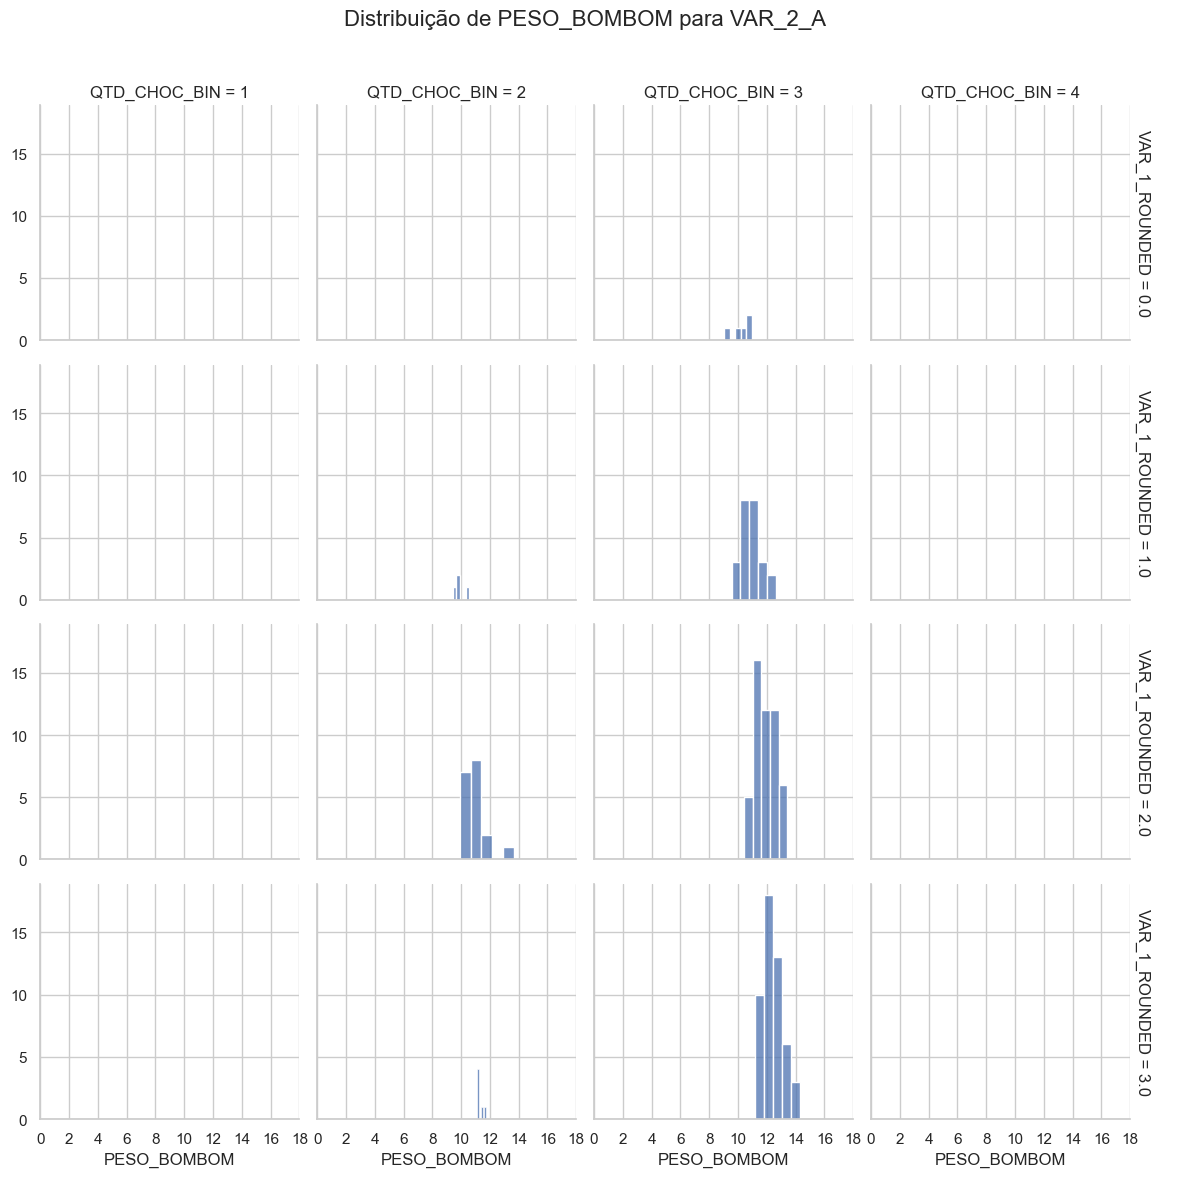

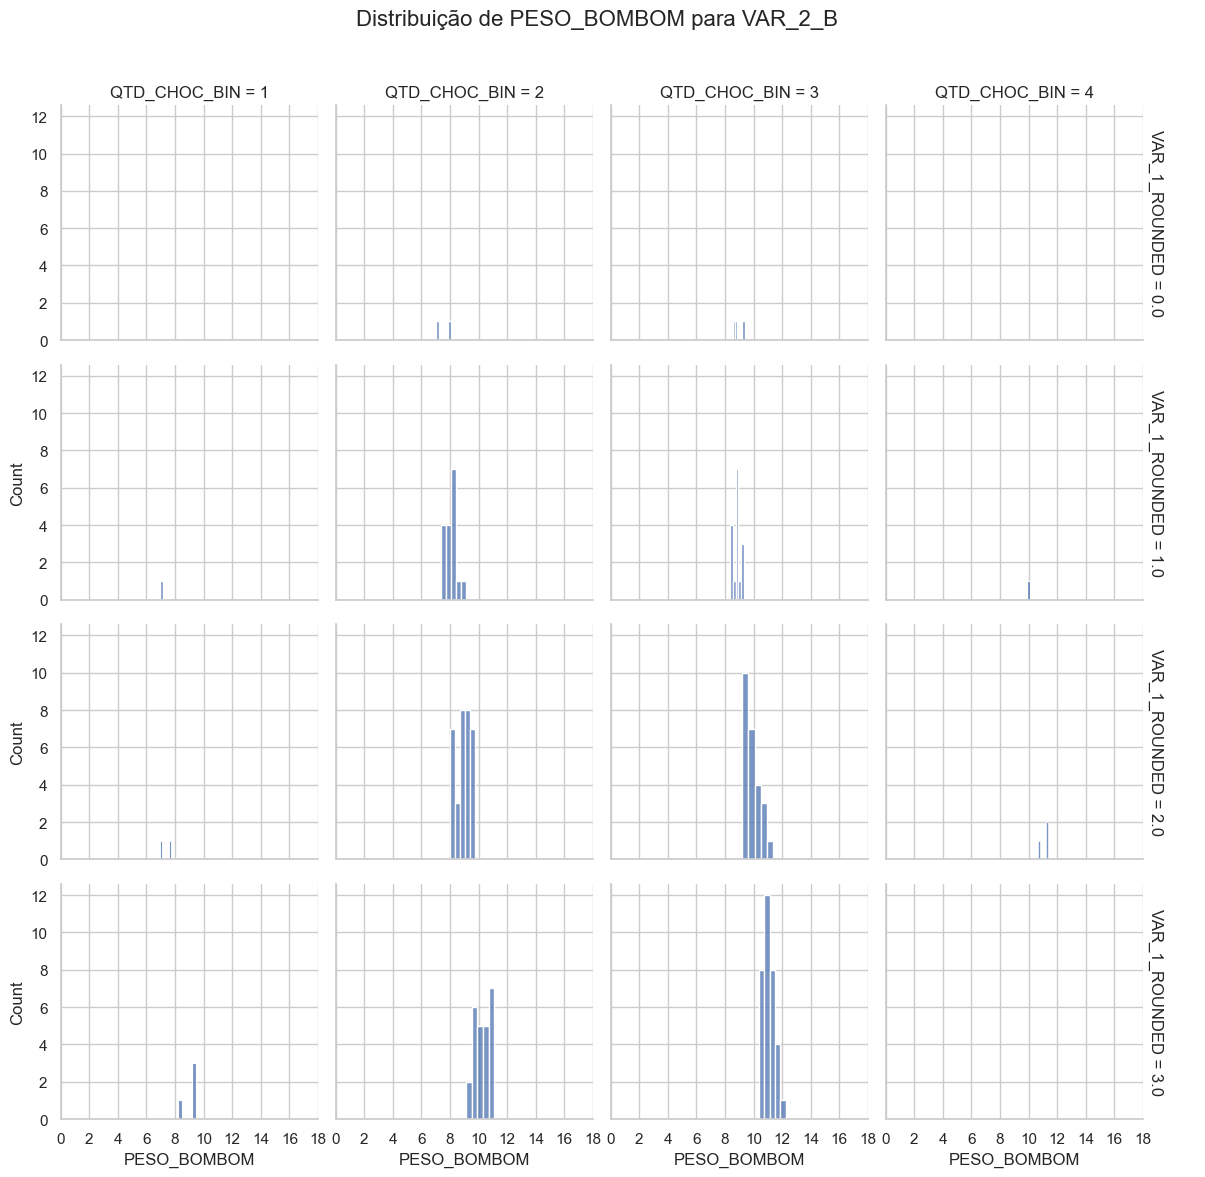

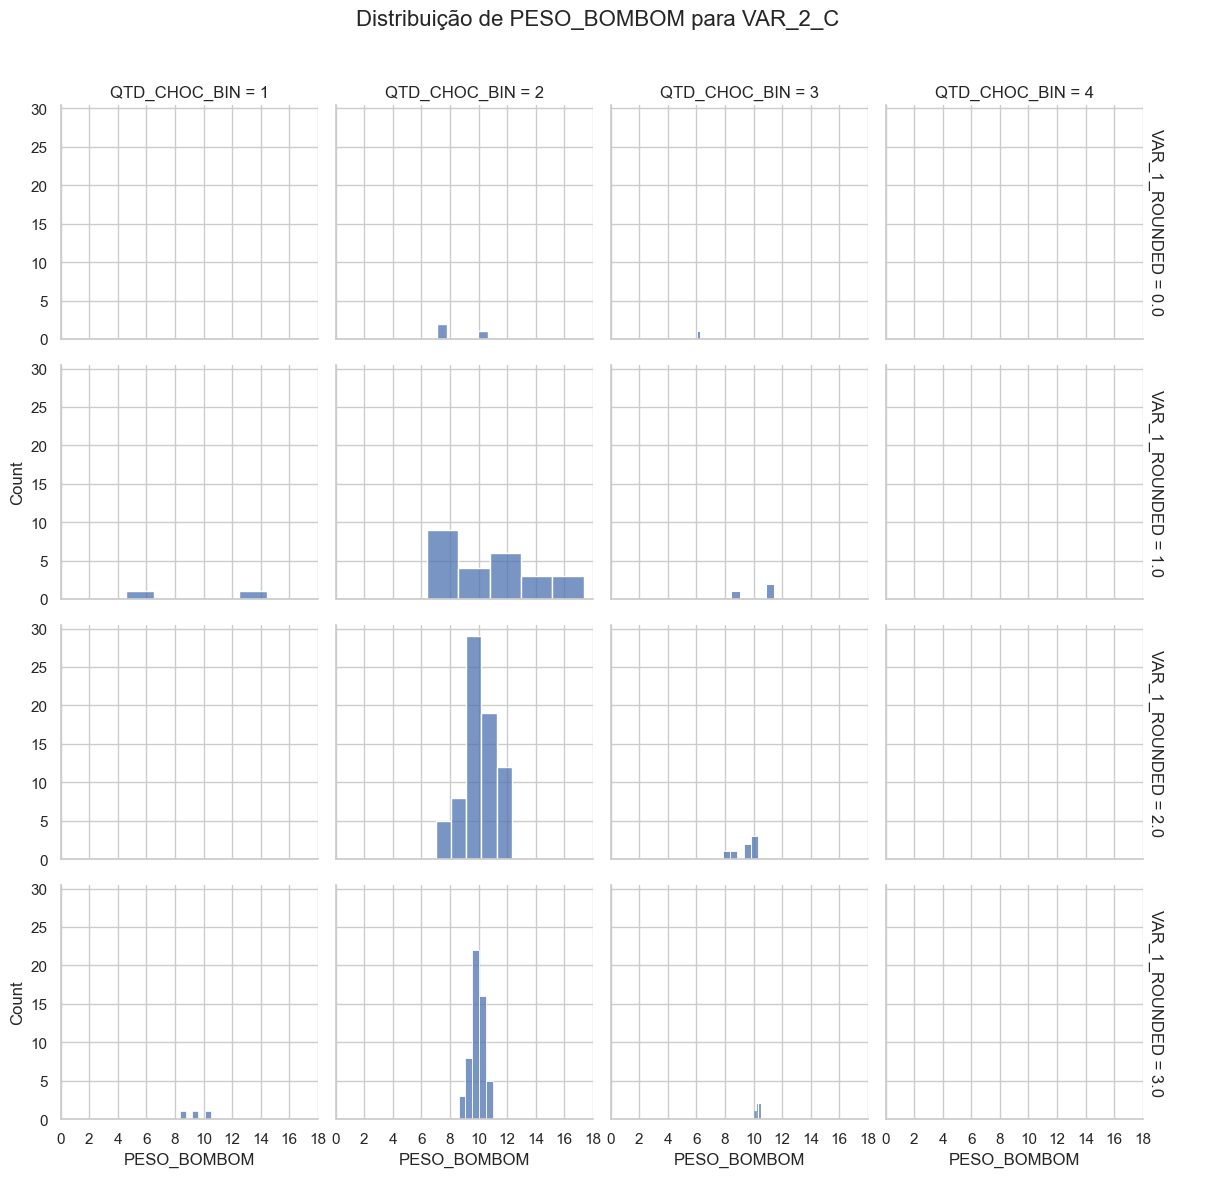

In [46]:
sns.set(style="whitegrid")

def plot_distributions(data, var_2_col, choc_bin_col='QTD_CHOC_BIN', peso_col='PESO_BOMBOM', var_1_rounded_col='VAR_1_ROUNDED', n_bins=5):
    filter = data[data[var_2_col] == 1]

    g = sns.FacetGrid(filter, col=choc_bin_col, row=var_1_rounded_col, margin_titles=True)
    g.map(sns.histplot, peso_col, kde=False, bins=n_bins) 

    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Distribuição de {peso_col} para {var_2_col}', fontsize=16)

    g.set(xticks=[0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
    g.add_legend()
    return g

g_A = plot_distributions(data, 'VAR_2_A')
plt.show()

g_B = plot_distributions(data, 'VAR_2_B')
plt.show()

g_C = plot_distributions(data, 'VAR_2_C')
plt.show()

In [47]:
data['QTD_CHOC_BIN'] = data['QTD_CHOC_BIN'].astype(np.float64)

In [48]:
fig = ff.create_annotated_heatmap(
    z=data.select_dtypes(include=[np.number]).corr().values,
    x=list(data.select_dtypes(include=[np.number]).columns),
    y=list(data.select_dtypes(include=[np.number]).columns),
    annotation_text=data.select_dtypes(include=[np.number]).corr().round(2).values,
    colorscale='Blues',
    showscale=True
)
fig.update_layout(autosize=False, width=700, height=600, margin=dict(t=50, b=50, l=50, r=50))
fig.show()